In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_svm_boundary(model,X,y):
    
    X = X.values
    y = y.values
    
    # Scatter Plot
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30,cmap='seismic')

    
    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

# Heart Disease Health Indicator Dataset


In [ ]:
df = pd.read_csv("heartdisease.csv")

In [ ]:
df.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
#drop NAN features
df=df.dropna()

<AxesSubplot:>

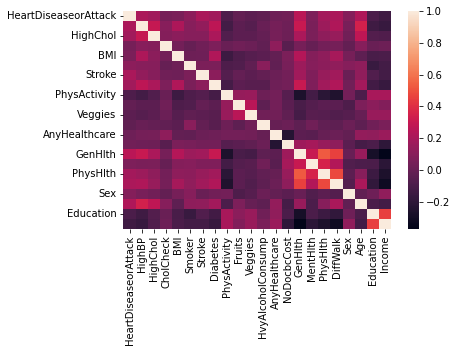

In [ ]:
sns.heatmap(df.corr())



**Question 1: possible outlier?**

## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

<AxesSubplot:>

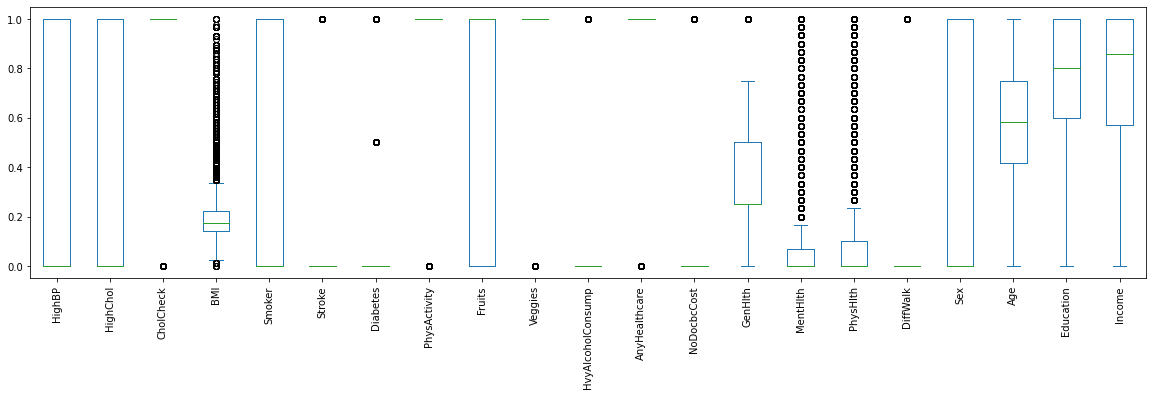

In [ ]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)
pd.DataFrame(X_train_norm, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

In [ ]:
X_train_norm

array([[0.        , 1.        , 1.        , ..., 0.91666667, 1.        ,
        1.        ],
       [0.        , 0.        , 1.        , ..., 0.58333333, 0.8       ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 0.91666667, 0.8       ,
        0.71428571],
       ...,
       [0.        , 1.        , 1.        , ..., 0.66666667, 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.33333333, 1.        ,
        0.71428571],
       [1.        , 0.        , 1.        , ..., 0.83333333, 0.8       ,
        0.71428571]])

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

### GridSearch for Best Hyper-Parameters

Main parameter choices are regularization penalty choice and regularization C value.

In [ ]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [ ]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [ ]:
grid_model.fit(X_train_norm,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [ ]:
grid_model.best_params_

{'C': 166.81005372000593, 'penalty': 'l2'}

### Model Performance on Classification Tasks

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = grid_model.predict(X_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.9084279407127089

In [ ]:
confusion_matrix(y_test,y_pred)

array([[45460,   508],
       [ 4138,   630]])

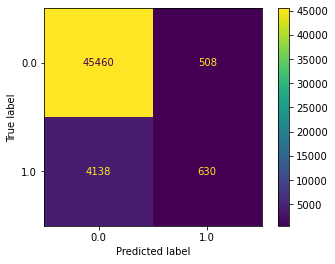

In [ ]:
plot_confusion_matrix(grid_model,X_test_norm,y_test)

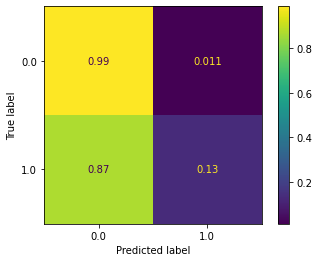

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(grid_model,X_test_norm,y_test,normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45968
         1.0       0.55      0.13      0.21      4768

    accuracy                           0.91     50736
   macro avg       0.74      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736



## KNN

### Intializing the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

### Elbow Method for Choosing Reasonable K Values



In [ ]:
test_error_rates = []


for k in range(1,21):
    print(k)
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_norm,y_train) 
   
    y_pred_test = knn_model.predict(X_test_norm)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20


Text(0.5, 0, 'K Value')

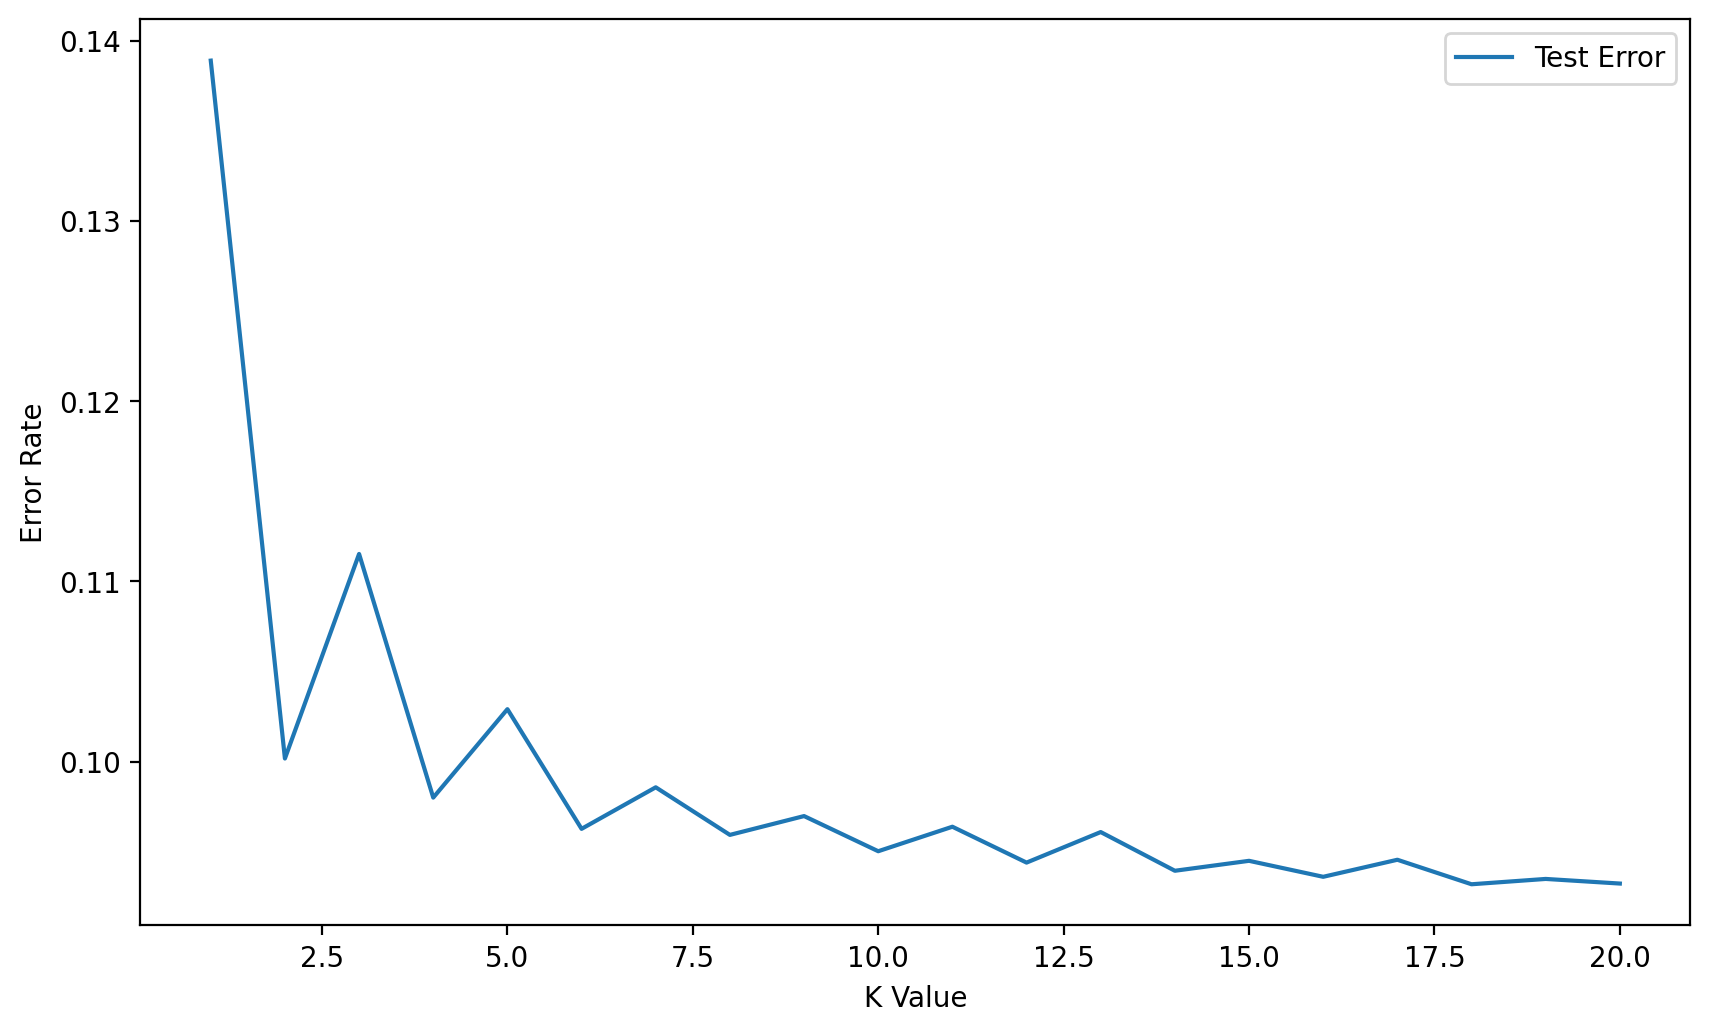

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,21),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

### Final Model

We just saw that our  GridSearch recommends a K=18 (in line with our alternative Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
knn18 = KNeighborsClassifier(n_neighbors=18)
operations = [('scaler',scaler),('knn18',knn18)]

In [ ]:
pipe = Pipeline(operations)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn18', KNeighborsClassifier(n_neighbors=18))])

In [ ]:
pipe_pred = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.53      0.08      0.13      4768

    accuracy                           0.91     50736
   macro avg       0.72      0.53      0.54     50736
weighted avg       0.88      0.91      0.87     50736



In [ ]:
single_sample = X_test.iloc[40]

In [ ]:
single_sample

HighBP                0.0
HighChol              0.0
CholCheck             1.0
BMI                  28.0
Smoker                1.0
Stroke                0.0
Diabetes              0.0
PhysActivity          0.0
Fruits                1.0
Veggies               1.0
HvyAlcoholConsump     0.0
AnyHealthcare         1.0
NoDocbcCost           0.0
GenHlth               5.0
MentHlth              0.0
PhysHlth             30.0
DiffWalk              1.0
Sex                   1.0
Age                  12.0
Education             5.0
Income                5.0
Name: 48851, dtype: float64

In [ ]:
pipe.predict(single_sample.values.reshape(1, -1))

array([0.])

In [ ]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

array([[0.55555556, 0.44444444]])

## SVM

### Linear Kernal

In [ ]:
from sklearn.svm import SVC  # Supprt Vector Classifier


In [ ]:

model = SVC(kernel='linear', C=1)
model.fit(X_train_norm,y_train)

SVC(C=1, kernel='linear')

In [ ]:
df_X_train_norm = pd.DataFrame(X_train_norm)

In [ ]:
df_X_train_norm

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.0,1.0,1.0,0.093023,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.000000,0.0,1.0,0.916667,1.0,1.000000
1,0.0,0.0,1.0,0.255814,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,1.0,0.583333,0.8,1.000000
2,1.0,1.0,1.0,0.139535,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.166667,0.0,1.0,0.916667,0.8,0.714286
3,0.0,1.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.00,0.0,0.000000,0.0,1.0,0.333333,1.0,0.857143
4,0.0,1.0,1.0,0.139535,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,1.0,0.0,0.916667,0.6,0.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202939,1.0,0.0,1.0,0.383721,1.0,0.0,0.0,1.0,1.0,0.0,...,1.0,1.0,0.00,0.5,0.000000,0.0,0.0,0.333333,0.6,0.000000
202940,1.0,1.0,1.0,0.197674,1.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.50,0.0,0.000000,0.0,1.0,0.833333,1.0,0.857143
202941,0.0,1.0,1.0,0.151163,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,0.25,0.0,0.100000,0.0,0.0,0.666667,1.0,1.000000
202942,0.0,0.0,0.0,0.127907,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,1.0,0.25,0.0,0.000000,0.0,0.0,0.333333,1.0,0.714286


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = model.predict(X_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.9060233364869127

In [ ]:
confusion_matrix(y_test,y_pred)

array([[45968,     0],
       [ 4768,     0]])

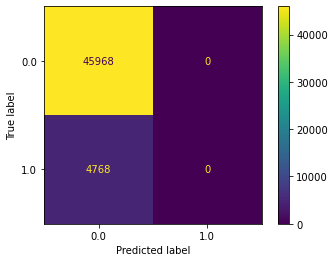

In [ ]:
plot_confusion_matrix(model,X_test_norm,y_test)

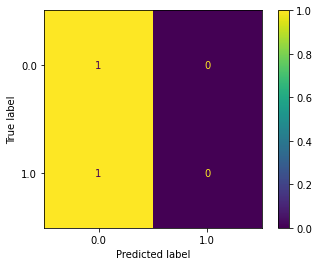

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(model,X_test_norm,y_test,normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45968
         1.0       0.00      0.00      0.00      4768

    accuracy                           0.91     50736
   macro avg       0.45      0.50      0.48     50736
weighted avg       0.82      0.91      0.86     50736



/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### First Non-linear Kernal 

In [ ]:
model = SVC(kernel='rbf', C=1)
model.fit(X_train_norm,y_train)


SVC(C=1)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = model.predict(X_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.9077775149795018

In [ ]:
confusion_matrix(y_test,y_pred)

array([[45837,   131],
       [ 4548,   220]], dtype=int64)

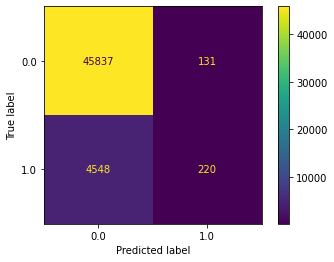

In [ ]:
plot_confusion_matrix(model,X_test_norm,y_test)

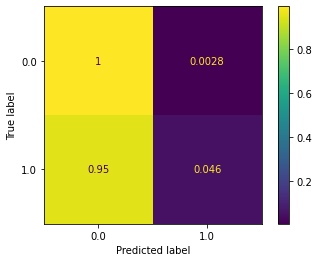

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(model,X_test_norm,y_test,normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95     45968
         1.0       0.63      0.05      0.09      4768

    accuracy                           0.91     50736
   macro avg       0.77      0.52      0.52     50736
weighted avg       0.88      0.91      0.87     50736



### Second Non-linear Kernal

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train_norm,y_train)


SVC(kernel='sigmoid')

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = model.predict(X_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.8301600441501104

In [ ]:
confusion_matrix(y_test,y_pred)

array([[41654,  4314],
       [ 4303,   465]], dtype=int64)

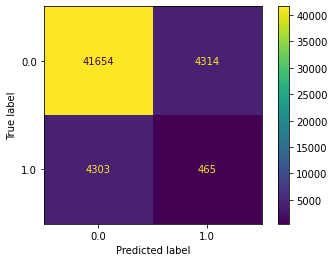

In [ ]:
plot_confusion_matrix(model,X_test_norm,y_test)

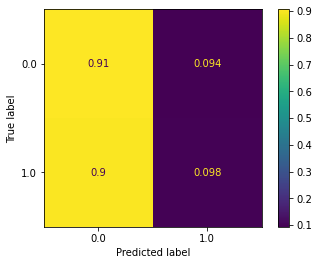

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(model,X_test_norm,y_test,normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91     45968
         1.0       0.10      0.10      0.10      4768

    accuracy                           0.83     50736
   macro avg       0.50      0.50      0.50     50736
weighted avg       0.83      0.83      0.83     50736



----

# Best model Model Selected for Heart disease dataset: Logistic regression model with c=166.8 and penalty =l2
As it has the highest combination of accuracy and f1-score of all the models

All other models have bad f1-score and for sigmoid SVM it has bad accuracy so we choose Logistic regression model

# Income Dataset


In [ ]:
df = pd.read_csv("Incometrain.csv")

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income_>50K
0,67,Private,366425,Doctorate,16,Divorced,Exec-managerial,Not-in-family,White,Male,99999,0,60,United-States,1
1,17,Private,244602,12th,8,Never-married,Other-service,Own-child,White,Male,0,0,15,United-States,0
2,31,Private,174201,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,1
3,58,State-gov,110199,7th-8th,4,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,0
4,25,State-gov,149248,Some-college,10,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,United-States,0


<AxesSubplot:>

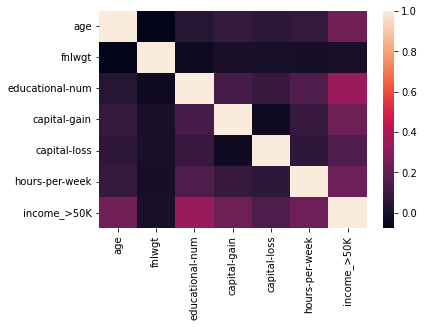

In [ ]:
sns.heatmap(df.corr())

In [ ]:
#drop NAN features
df=df.dropna()

In [ ]:
#Before we do one hot encoding we have to do some feature engineering as we have alot of unique variable
#which will lead to very big range of columns

#Replace simillar values of eduaction
df['education'].replace('Preschool', 'dropout',inplace=True)
df['education'].replace('10th', 'dropout',inplace=True)
df['education'].replace('11th', 'dropout',inplace=True)
df['education'].replace('12th', 'dropout',inplace=True)
df['education'].replace('1st-4th', 'dropout',inplace=True)
df['education'].replace('5th-6th', 'dropout',inplace=True)
df['education'].replace('7th-8th', 'dropout',inplace=True)
df['education'].replace('9th', 'dropout',inplace=True)
df['education'].replace('HS-Grad', 'HighGrad',inplace=True)
df['education'].replace('HS-grad', 'HighGrad',inplace=True)
df['education'].replace('Some-college', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-acdm', 'CommunityCollege',inplace=True)
df['education'].replace('Assoc-voc', 'CommunityCollege',inplace=True)
df['education'].replace('Bachelors', 'Bachelors',inplace=True)
df['education'].replace('Masters', 'Masters',inplace=True)
df['education'].replace('Prof-school', 'Masters',inplace=True)
df['education'].replace('Doctorate', 'Doctorate',inplace=True)
df['education'].unique()

array(['Doctorate', 'dropout', 'Bachelors', 'CommunityCollege',
       'HighGrad', 'Masters'], dtype=object)

In [ ]:
#df2 = my_df['marital-status'].replace(' Never-married', 'NotMarried')
df['marital-status'].replace('Never-married', 'NotMarried',inplace=True)
df['marital-status'].replace(['Married-AF-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-civ-spouse'], 'Married',inplace=True)
df['marital-status'].replace(['Married-spouse-absent'], 'NotMarried',inplace=True)
df['marital-status'].replace(['Separated'], 'Separated',inplace=True)
df['marital-status'].replace(['Divorced'], 'Separated',inplace=True)
df['marital-status'].replace(['Widowed'], 'Widowed',inplace=True)
df['marital-status'].unique()

array(['Separated', 'NotMarried', 'Married', 'Widowed'], dtype=object)

In [ ]:
# Doing first one-hot encoding by getting dummy variables
df_nums = df.select_dtypes(exclude='object')
df_objs = df.select_dtypes(include='object')

In [ ]:
df_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40727 entries, 0 to 43956
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              40727 non-null  int64
 1   fnlwgt           40727 non-null  int64
 2   educational-num  40727 non-null  int64
 3   capital-gain     40727 non-null  int64
 4   capital-loss     40727 non-null  int64
 5   hours-per-week   40727 non-null  int64
 6   income_>50K      40727 non-null  int64
dtypes: int64(7)
memory usage: 2.5 MB


In [ ]:
df_objs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40727 entries, 0 to 43956
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   workclass       40727 non-null  object
 1   education       40727 non-null  object
 2   marital-status  40727 non-null  object
 3   occupation      40727 non-null  object
 4   relationship    40727 non-null  object
 5   race            40727 non-null  object
 6   gender          40727 non-null  object
 7   native-country  40727 non-null  object
dtypes: object(8)
memory usage: 2.8+ MB


In [ ]:
df_objs = pd.get_dummies(df_objs,drop_first=True)

In [ ]:
df = pd.concat([df_nums,df_objs],axis=1)

In [ ]:
df

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,income_>50K,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,67,366425,16,99999,0,60,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,17,244602,8,0,0,15,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,31,174201,13,0,0,40,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,58,110199,4,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,25,149248,10,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43952,52,68982,13,0,0,50,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
43953,19,116562,9,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
43954,30,197947,10,0,0,58,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
43955,46,97883,13,0,0,35,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('income_>50K', axis=1)
y = df['income_>50K']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [ ]:
X_train.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
2960,23,164231,7,0,0,35,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
23120,17,132187,6,0,0,15,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
39267,23,163595,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
22590,20,209131,10,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
10968,55,401473,14,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)
#pd.DataFrame(X_train_norm, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

In [ ]:
X_train_norm

array([[0.08219178, 0.10189546, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.08019471, 0.33333333, ..., 1.        , 0.        ,
        0.        ],
       [0.08219178, 0.10146475, 0.8       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.19178082, 0.0924774 , 0.73333333, ..., 1.        , 0.        ,
        0.        ],
       [0.4109589 , 0.11345963, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.21917808, 0.14624304, 0.53333333, ..., 1.        , 0.        ,
        0.        ]])

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

### GridSearch for Best Hyper-Parameters

Main parameter choices are regularization penalty choice and regularization C value.

In [ ]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [ ]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [ ]:
grid_model.fit(X_train_norm,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [ ]:
grid_model.best_params_

{'C': 2.7825594022071245, 'penalty': 'l1'}

### Model Performance on Classification Tasks

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = grid_model.predict(X_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.8437269825681316

In [ ]:
confusion_matrix(y_test,y_pred)

array([[5677,  458],
       [ 815, 1196]], dtype=int64)

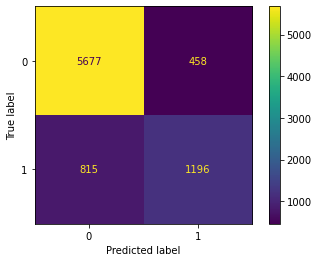

In [ ]:
plot_confusion_matrix(grid_model,X_test_norm,y_test)

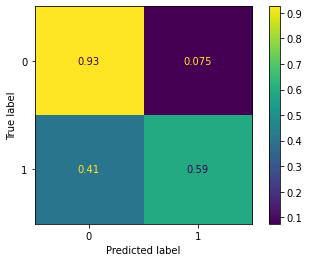

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(grid_model,X_test_norm,y_test,normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6135
           1       0.72      0.59      0.65      2011

    accuracy                           0.84      8146
   macro avg       0.80      0.76      0.78      8146
weighted avg       0.84      0.84      0.84      8146



## KNN

### Intializing the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Elbow Method for Choosing Reasonable K Values



In [ ]:
test_error_rates = []


for k in range(5,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_norm,y_train) 
   
    y_pred_test = knn_model.predict(X_test_norm)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

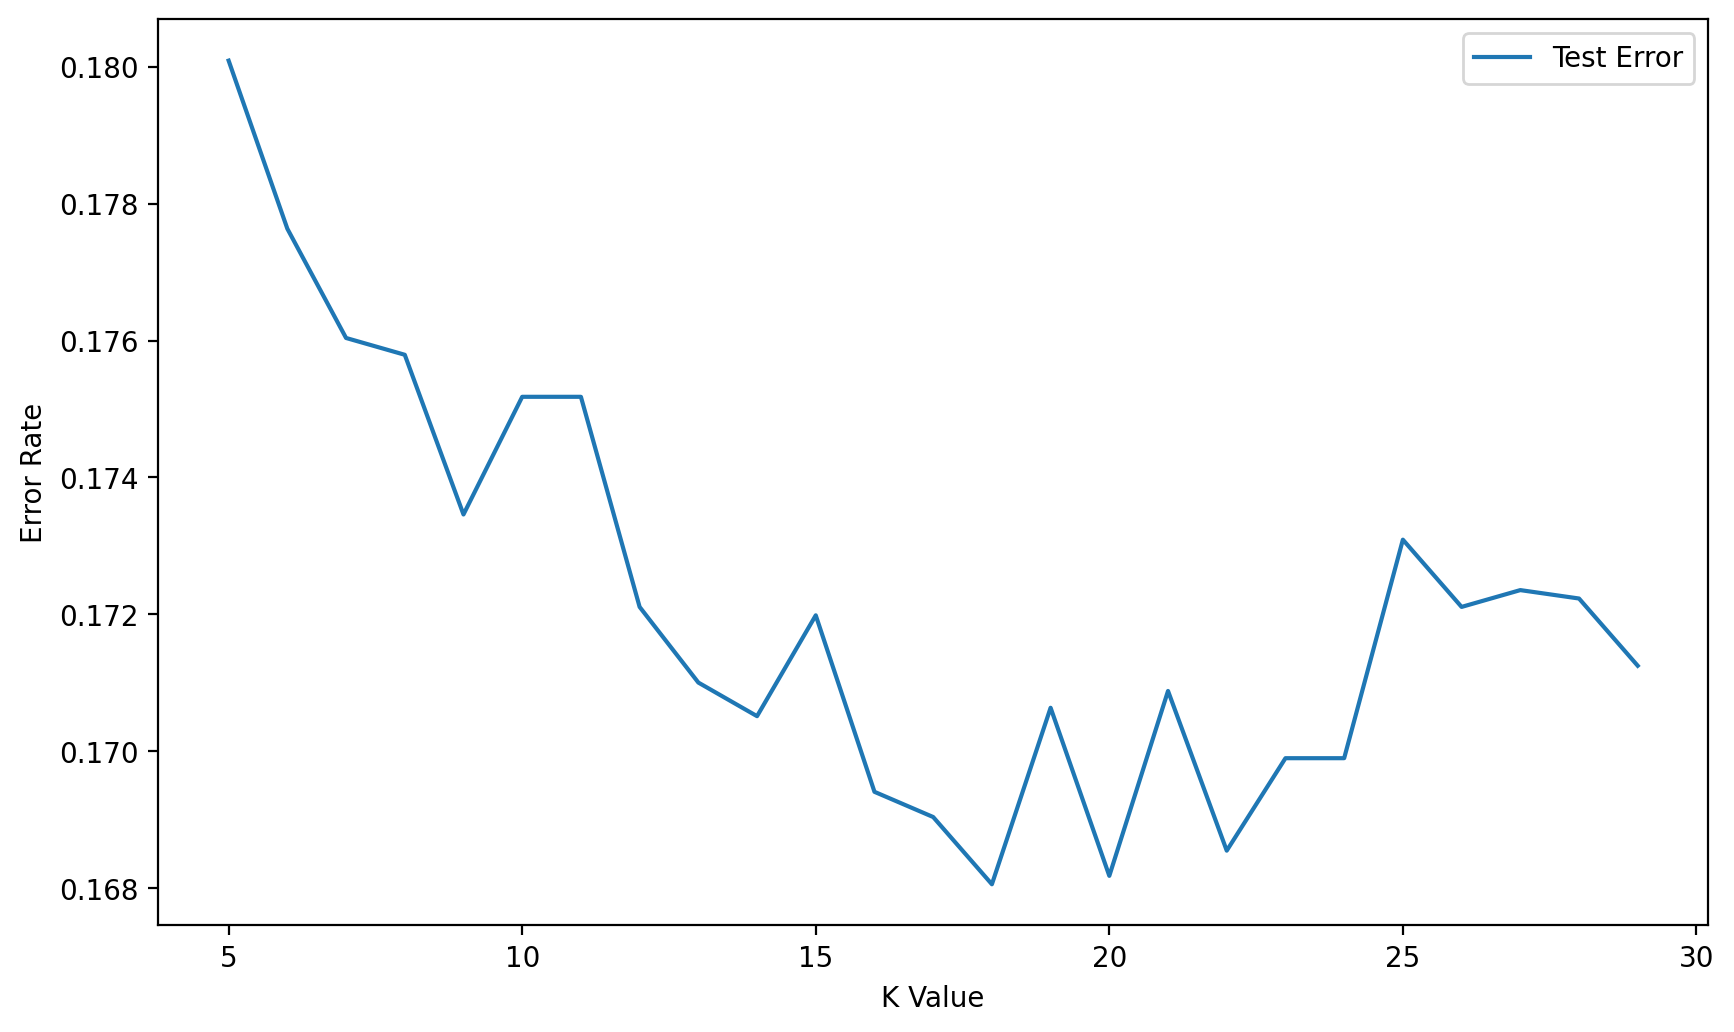

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(5,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

### Final Model

We just saw that our  GridSearch recommends a K=14 (in line with our alternative Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

scaler = StandardScaler()
knn18 = KNeighborsClassifier(n_neighbors=18)
operations = [('scaler',scaler),('knn18',knn18)]

In [ ]:
pipe = Pipeline(operations)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn18', KNeighborsClassifier(n_neighbors=18))])

In [ ]:
pipe_pred = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89      6135
           1       0.70      0.53      0.60      2011

    accuracy                           0.83      8146
   macro avg       0.78      0.73      0.75      8146
weighted avg       0.82      0.83      0.82      8146



In [ ]:
single_sample = X_test.iloc[40]

In [ ]:
single_sample

age                                   35
fnlwgt                            117567
educational-num                        9
capital-gain                           0
capital-loss                           0
                                   ...  
native-country_Thailand                0
native-country_Trinadad&Tobago         0
native-country_United-States           1
native-country_Vietnam                 0
native-country_Yugoslavia              0
Name: 26908, Length: 83, dtype: int64

In [ ]:
pipe.predict(single_sample.values.reshape(1, -1))

array([0], dtype=int64)

In [ ]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

array([[1., 0.]])

----

## SVM

### Linear Kernal

In [ ]:
from sklearn.svm import SVC # Supprt Vector Classifier
model = SVC(kernel='linear')
model.fit(X_train_norm,y_train)

SVC(kernel='linear')

In [ ]:
df_X_train_norm = pd.DataFrame(X_train_norm)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = model.predict(X_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.8449545789344464

In [ ]:
confusion_matrix(y_test,y_pred)

array([[5727,  408],
       [ 855, 1156]], dtype=int64)

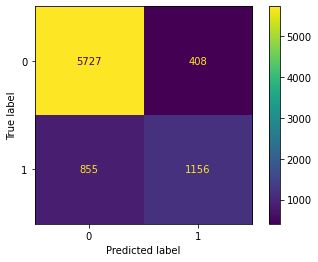

In [ ]:
plot_confusion_matrix(model,X_test_norm,y_test)

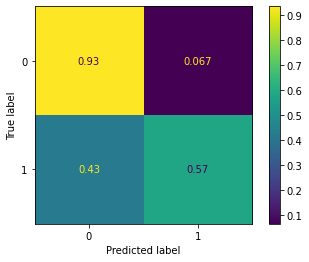

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(model,X_test_norm,y_test,normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      6135
           1       0.74      0.57      0.65      2011

    accuracy                           0.84      8146
   macro avg       0.80      0.75      0.77      8146
weighted avg       0.84      0.84      0.84      8146



### First Non-linear Kernal 

In [ ]:
model = SVC(kernel='rbf')
model.fit(X_train_norm,y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.8341517309108765

In [ ]:
confusion_matrix(y_test,y_pred)

array([[5700,  435],
       [ 916, 1095]], dtype=int64)

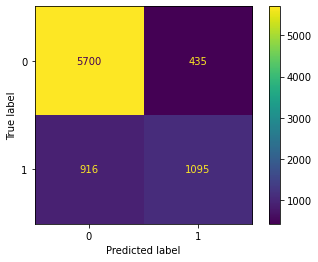

In [ ]:
plot_confusion_matrix(model,X_test_norm,y_test)

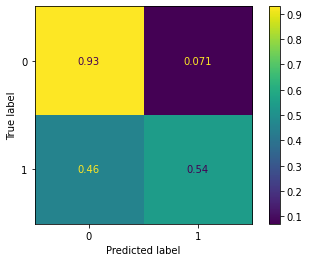

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(model,X_test_norm,y_test,normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89      6135
           1       0.72      0.54      0.62      2011

    accuracy                           0.83      8146
   macro avg       0.79      0.74      0.76      8146
weighted avg       0.83      0.83      0.83      8146



### Second Non-linear Kernal

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train_norm,y_train)


SVC(kernel='sigmoid')

In [ ]:
y_pred = model.predict(X_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.7752271053277683

In [ ]:
confusion_matrix(y_test,y_pred)

array([[5229,  906],
       [ 925, 1086]], dtype=int64)

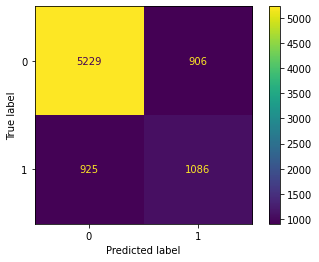

In [ ]:
plot_confusion_matrix(model,X_test_norm,y_test)

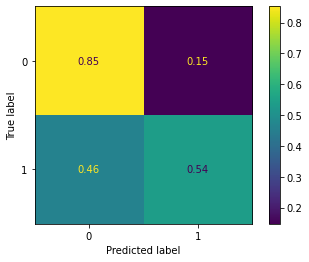

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(model,X_test_norm,y_test,normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      6135
           1       0.55      0.54      0.54      2011

    accuracy                           0.78      8146
   macro avg       0.70      0.70      0.70      8146
weighted avg       0.77      0.78      0.77      8146



# Best model selected for Income dataset is : Logistic regression model with c=2.8 and penalty = l1, and SVM linear model as both of them have the same highest accuracy and f1-score of all the models




# Gene Expression Dataset


In [ ]:
df = pd.read_csv("gene_expression.csv")

In [ ]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


In [ ]:
#drop NAN features
df=df.dropna()

<AxesSubplot:>

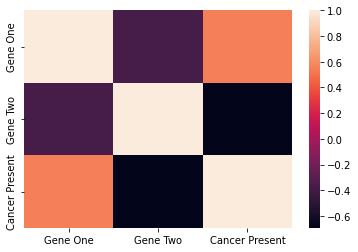

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.corr()['Gene Two'].sort_values()

Cancer Present   -0.692352
Gene One         -0.375427
Gene Two          1.000000
Name: Gene Two, dtype: float64

<AxesSubplot:xlabel='Gene One', ylabel='Cancer Present'>

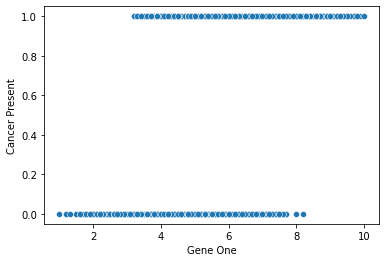

In [ ]:
sns.scatterplot(x='Gene One',y='Cancer Present',data=df)

<AxesSubplot:xlabel='Gene Two', ylabel='Cancer Present'>

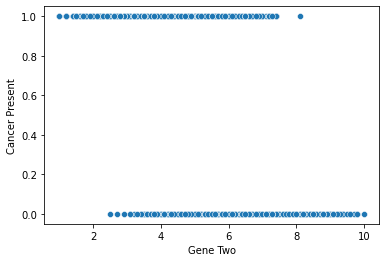

In [ ]:
sns.scatterplot(x='Gene Two',y='Cancer Present',data=df)



**Question 1: possible outlier?**

## Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop('Cancer Present', axis=1)
y = df['Cancer Present']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

<AxesSubplot:>

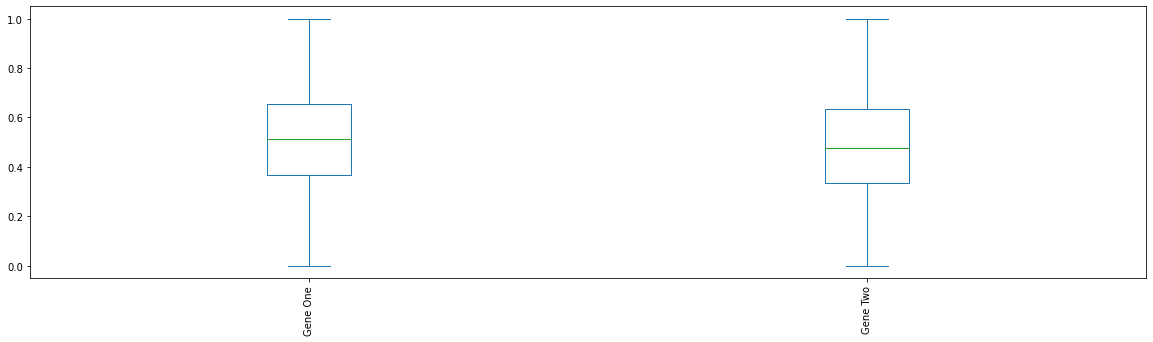

In [ ]:
norm = MinMaxScaler().fit(X_train)
X_train_norm = norm.transform(X_train)
X_test_norm = norm.transform(X_test)
pd.DataFrame(X_train_norm, columns=X_train.columns).plot.box(figsize=(20,5), rot=90)

In [ ]:
X_train_norm

array([[0.41111111, 0.58888889],
       [0.54444444, 0.61111111],
       [0.56666667, 0.52222222],
       ...,
       [0.48888889, 0.3       ],
       [0.5       , 0.68888889],
       [0.85555556, 0.44444444]])

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Depending on warnings you may need to adjust max iterations allowed 
# Or experiment with different solvers
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

### GridSearch for Best Hyper-Parameters

Main parameter choices are regularization penalty choice and regularization C value.

In [ ]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [ ]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})

In [ ]:
grid_model.fit(X_train_norm,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [ ]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l2'}

### Model Performance on Classification Tasks

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = grid_model.predict(X_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.8466666666666667

In [ ]:
confusion_matrix(y_test,y_pred)

array([[275,  53],
       [ 39, 233]])

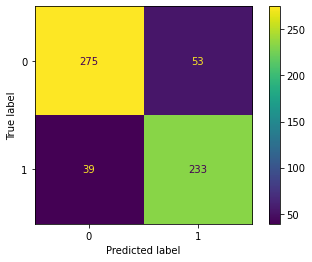

In [ ]:
plot_confusion_matrix(grid_model,X_test_norm,y_test)

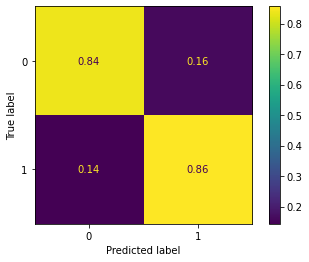

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(grid_model,X_test_norm,y_test,normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       328
           1       0.81      0.86      0.84       272

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



## KNN

### Intializing the model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

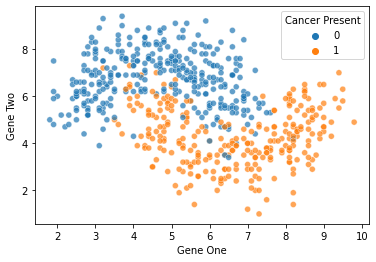

In [ ]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',
                data=full_test,alpha=0.7)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

### Elbow Method for Choosing Reasonable K Values



In [ ]:
test_error_rates = []


for k in range(5,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_norm,y_train) 
   
    y_pred_test = knn_model.predict(X_test_norm)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

Text(0.5, 0, 'K Value')

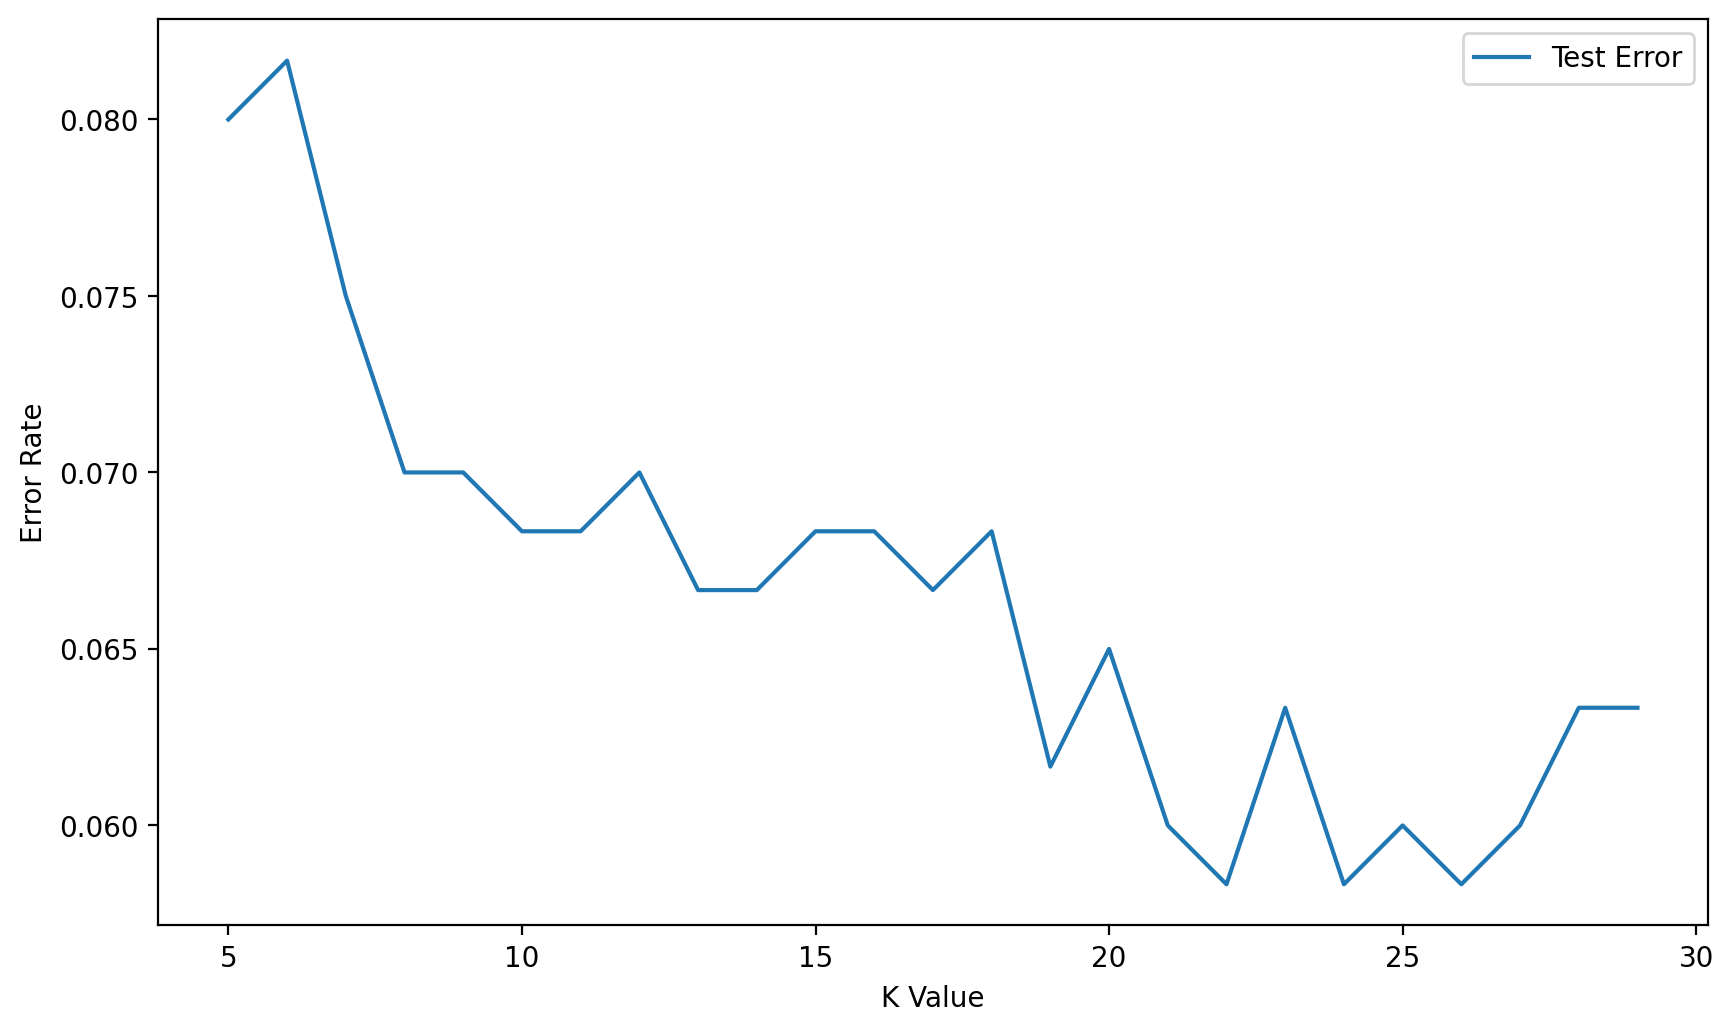

In [ ]:
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(5,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")

### Final Model

We just saw that our  GridSearch recommends a K=22 (in line with our alternative Elbow Method). Let's now use the PipeLine again, but this time, no need to do a grid search, instead we will evaluate on our hold-out Test Set.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
scaler = StandardScaler()
knn22 = KNeighborsClassifier(n_neighbors=22)
operations = [('scaler',scaler),('knn22',knn22)]

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipe = Pipeline(operations)

In [ ]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn22', KNeighborsClassifier(n_neighbors=22))])

In [ ]:
pipe_pred = pipe.predict(X_test)

In [ ]:
print(classification_report(y_test,pipe_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       328
           1       0.94      0.93      0.94       272

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



In [ ]:
single_sample = X_test.iloc[40]

In [ ]:
single_sample

Gene One    3.8
Gene Two    6.3
Name: 194, dtype: float64

In [ ]:
pipe.predict(single_sample.values.reshape(1, -1))

array([0])

In [ ]:
pipe.predict_proba(single_sample.values.reshape(1, -1))

array([[0.86363636, 0.13636364]])

----

## SVM

### Linear Kernal

In [ ]:
from sklearn.svm import SVC # Supprt Vector Classifier
model = SVC(kernel='linear', C=1)
model.fit(X_train_norm,y_train)

SVC(C=1, kernel='linear')

In [ ]:
df_X_train_norm = pd.DataFrame(X_train_norm)

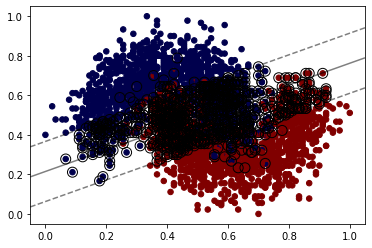

In [ ]:
plot_svm_boundary(model,df_X_train_norm,y_train)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = model.predict(X_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.8466666666666667

In [ ]:
confusion_matrix(y_test,y_pred)

array([[275,  53],
       [ 39, 233]])

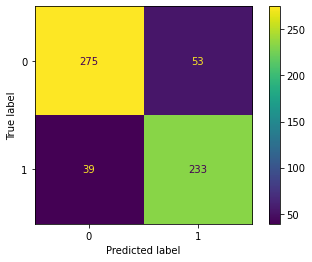

In [ ]:
plot_confusion_matrix(model,X_test_norm,y_test)

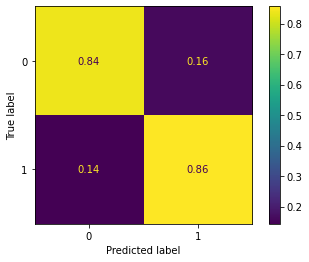

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(model,X_test_norm,y_test,normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86       328
           1       0.81      0.86      0.84       272

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



### First Non-linear Kernal 

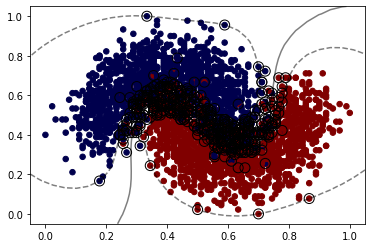

In [ ]:
model = SVC(kernel='rbf', C=1)
model.fit(X_train_norm,y_train)
plot_svm_boundary(model,df_X_train_norm,y_train)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = model.predict(X_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.9433333333333334

In [ ]:
confusion_matrix(y_test,y_pred)

array([[313,  15],
       [ 19, 253]])

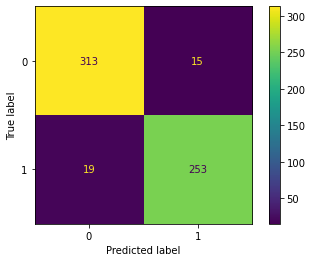

In [ ]:
plot_confusion_matrix(model,X_test_norm,y_test)

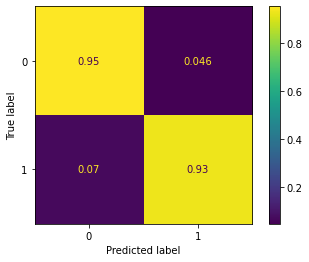

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(model,X_test_norm,y_test,normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       328
           1       0.94      0.93      0.94       272

    accuracy                           0.94       600
   macro avg       0.94      0.94      0.94       600
weighted avg       0.94      0.94      0.94       600



### Second Non-linear Kernal

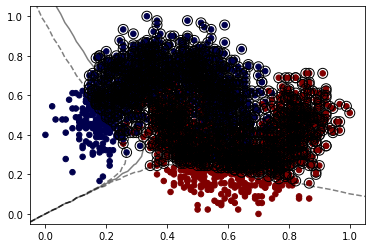

In [ ]:
model = SVC(kernel='sigmoid')
model.fit(X_train_norm,y_train)
plot_svm_boundary(model,df_X_train_norm,y_train)

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [ ]:
y_pred = model.predict(X_test_norm)

In [ ]:
accuracy_score(y_test,y_pred)

0.5366666666666666

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 53, 275],
       [  3, 269]])

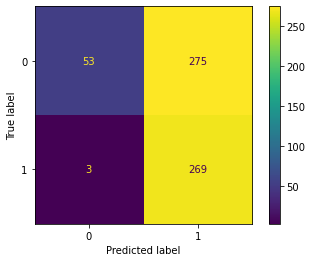

In [ ]:
plot_confusion_matrix(model,X_test_norm,y_test)

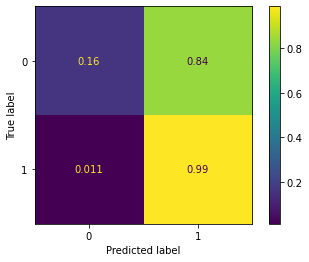

In [ ]:
# Scaled so highest value=1
plot_confusion_matrix(model,X_test_norm,y_test,normalize='true')

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.16      0.28       328
           1       0.49      0.99      0.66       272

    accuracy                           0.54       600
   macro avg       0.72      0.58      0.47       600
weighted avg       0.74      0.54      0.45       600



#### Best model selected for the gene expression is the KNN model with k=22 as it has the highest accuracy, f1-score, recall and precision. Also the first non-linear kernal (rbf) gave nearly the same scores as the knn, except the percision of class 0 was less by 0.01 